# Additional Information: 
Doi: doi:10.1038/nm.1790 <br>
Titel: Gene expression–based survival prediction in lung adenocarcinoma: a multi-site, blinded validation study <br>

"Although prognostic gene expression signatures for survival in early-stage lung cancer have been proposed, for clinical application,
it is critical to establish their performance across different subject populations and in different laboratories. Here we report a large,
training–testing, multi-site, blinded validation study to characterize the performance of several prognostic models based on gene
expression for 442 lung adenocarcinomas. The hypotheses proposed examined whether microarray measurements of gene
expression either alone or combined with basic clinical covariates (stage, age, sex) could be used to predict overall survival in lung
cancer subjects. Several models examined produced risk scores that substantially correlated with actual subject outcome. Most
methods performed better with clinical data, supporting the combined use of clinical and molecular information when building
prognostic models for early-stage lung cancer. This study also provides the largest available set of microarray data with extensive
pathological and clinical annotation for lung adenocarcinomas."

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    

In [2]:
import math

In [3]:
from collections import Counter

In [4]:
from imblearn.over_sampling import RandomOverSampler

# 1. Loading Data

### 1.2 Loading genexpression data

In [5]:
s = "/home/cmkl64/Notebooks/lung-cancer-nolog-data.txt"
df = pd.read_csv(s, sep="\t", index_col=0)

In [6]:
df

,CL2004110909AA.CEL,CL2004111002AA.CEL,CL2004111003AA.CEL,CL20041110100AA.CEL,CL20041110102AA.CEL,CL20041110103AA.CEL,CL20041110104AA.CEL,CL20041110107AA.CEL,CL20041110108AA.CEL,CL20041110109AA.CEL,...,NCI_U133A_91L.CEL,NCI_U133A_92L.CEL,NCI_U133A_93L.CEL,NCI_U133A_94L_Rep.CEL,NCI_U133A_95L.CEL,NCI_U133A_96L.CEL,NCI_U133A_97L.CEL,NCI_U133A_98L.CEL,NCI_U133A_99L.CEL,NCI_U133A_9L.CEL
1007_s_at,1380.744740,1208.209804,1055.353196,1717.166083,1522.533012,1054.470428,1595.491850,1390.078519,938.830046,1374.410962,...,1643.132844,1432.763284,1979.807072,1391.911781,1202.384079,1510.834741,1384.136349,1376.267031,1916.388974,980.892807
1053_at,121.782436,239.269252,106.409026,142.861157,167.474424,242.842217,140.722350,154.480949,139.537473,147.602862,...,79.485086,149.010384,77.301979,127.282150,125.549117,88.386624,80.854212,114.619584,88.647775,88.905858
117_at,120.655084,143.564571,139.706039,252.180792,156.250878,115.180029,149.486328,193.086406,168.539489,169.100919,...,152.042506,174.424113,110.712789,175.436917,141.088657,174.201894,123.461847,126.893112,125.866406,213.849724
121_at,477.262308,435.249517,455.119295,515.908331,618.407585,509.092646,539.072808,618.912892,469.771907,446.136154,...,466.581921,394.558095,392.723451,401.774636,420.644771,438.041773,485.355056,351.303845,388.430077,392.898101
1255_g_at,19.231271,26.045475,21.657461,24.515888,25.599587,39.354411,22.367155,23.986820,18.800381,20.125385,...,20.056260,19.667302,18.723320,20.635843,20.457443,21.547703,24.006203,18.455896,20.470509,19.765795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,27.691712,29.662395,28.876305,33.780732,34.320925,27.175070,34.639387,37.220333,25.428120,24.963601,...,24.267316,20.641986,21.567702,22.129698,22.829493,23.376596,26.140359,20.450796,23.693351,22.593383
AFFX-ThrX-M_at,16.692334,18.725613,17.300751,19.071308,18.513988,17.551432,18.308123,20.808795,16.098127,16.779476,...,16.849402,15.482806,15.821907,17.241370,16.573967,17.205626,16.381969,15.338559,17.952711,16.360990
AFFX-TrpnX-3_at,15.029212,15.016479,15.093579,15.528897,14.488005,13.620812,14.167589,14.723337,14.140804,13.882785,...,14.703533,13.975713,14.409148,14.048668,14.615169,14.488086,13.793806,13.527665,14.208977,14.310738
AFFX-TrpnX-5_at,18.900888,19.551489,19.318176,21.788908,19.766011,17.661527,18.353063,21.704247,17.651498,17.408623,...,18.777040,17.764831,17.202289,18.536093,19.183261,19.187652,19.919979,16.981491,18.871785,18.257639


### 1.3 Normalizing data

In [7]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

dfnorm = min_max_scaling(df)

### 1.4 Modulations of the data structure

In [8]:
dfnorm = dfnorm.T
dfnorm.reset_index(inplace=True)
dfnorm.rename(columns = {'index': 'ArrayDataFile'}, inplace = True)

In [9]:
dfnorm

,ArrayDataFile,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,CL2004110909AA.CEL,0.071430,0.005760,0.005701,0.024302,0.000411,0.011707,0.001618,0.001411,0.014964,...,0.028022,0.003310,0.228513,0.214500,0.001481,0.000852,0.000278,0.000191,0.000393,0.000273
1,CL2004111002AA.CEL,0.065998,0.012555,0.007276,0.023365,0.000795,0.015522,0.002151,0.001664,0.021280,...,0.111226,0.020267,0.289917,0.301686,0.001778,0.000994,0.000391,0.000186,0.000436,0.000394
2,CL2004111003AA.CEL,0.046493,0.004223,0.005706,0.019756,0.000448,0.013517,0.001995,0.000917,0.013734,...,0.034405,0.012125,0.188441,0.185570,0.001522,0.000769,0.000254,0.000155,0.000344,0.000260
3,CL20041110100AA.CEL,0.078186,0.006029,0.011039,0.023127,0.000604,0.013973,0.001985,0.001329,0.007769,...,0.026939,0.007253,0.283979,0.268400,0.001884,0.001029,0.000355,0.000193,0.000479,0.000295
4,CL20041110102AA.CEL,0.088275,0.009129,0.008473,0.035467,0.000842,0.013404,0.002317,0.001679,0.003053,...,0.013443,0.003801,0.361468,0.355082,0.002195,0.001351,0.000428,0.000193,0.000501,0.000357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,NCI_U133A_96L.CEL,0.068483,0.003511,0.007431,0.019482,0.000458,0.011218,0.001537,0.000791,0.001765,...,0.137631,0.035983,0.487187,0.489297,0.001418,0.000541,0.000260,0.000135,0.000350,0.000278
458,NCI_U133A_97L.CEL,0.067868,0.003420,0.005527,0.023423,0.000609,0.015418,0.001484,0.001177,0.007785,...,0.051714,0.023065,0.427509,0.404828,0.001313,0.000715,0.000232,0.000104,0.000407,0.000234
459,NCI_U133A_98L.CEL,0.064353,0.004883,0.005462,0.016040,0.000351,0.014012,0.001406,0.000891,0.009050,...,0.071700,0.010529,0.557804,0.542357,0.001096,0.000445,0.000204,0.000118,0.000281,0.000230
460,NCI_U133A_99L.CEL,0.094925,0.003843,0.005698,0.018782,0.000446,0.009699,0.001749,0.001169,0.002778,...,0.218082,0.013550,0.551452,0.571956,0.001531,0.000607,0.000321,0.000134,0.000366,0.000268


### 1.5 Removing the AFFX files / standardts

In [10]:
dfnorm = dfnorm.loc[:,~dfnorm.columns.str.startswith('AFFX')] # deleting the AFFX "genes" 

In [11]:
22284-len(dfnorm.T) # number of removed AFFX "genes"

68

### 1.6 Loading metadata

In [12]:
m = "/home/cmkl64/Notebooks/jacob-00182.sdrf"
metadata = pd.read_csv(m, sep="\t")
metadata.T
metadata = metadata[metadata["Array Data File"].notna()]
metadata = metadata[metadata["Provider"]!='Stratagene'] #delete control data

In [13]:
metadata

,Source Name,Provider,Characteristics[DiseaseState],Term Source REF,Characteristics[DiseaseStage],Term Source REF.1,Characteristics[Sex],Term Source REF.2,Characteristics[SMOKING_HISTORY],Term Source REF.3,...,Material Type.2,Term Source REF.18,Labeled Extract Name,Label,Term Source REF.19,Material Type.3,Term Source REF.20,Hybridization Name,Array Data File,Derived Array Data File
0,621,MI,Lung Adenocarcinoma,NCI_Thesaurus,pN0pT1,AJCC,male,MO,Unknown,caArray,...,total_RNA,MO,621,biotin,caArray,synthetic_RNA,MO,A298,NCI_Lung298_U133.CEL,NaN
3,168,MSKCC,Lung Adenocarcinoma,NCI_Thesaurus,pN0pT2,AJCC,male,MO,Smoked in the past,caArray,...,total_RNA,MO,168,biotin,caArray,synthetic_RNA,MO,B-NCI_U133A_18L.CHP,NCI_U133A_18L.CEL,NaN
5,466,HLM,Lung Adenocarcinoma,NCI_Thesaurus,pN0pT4,AJCC,female,MO,Smoked in the past,caArray,...,total_RNA,MO,466,biotin,caArray,synthetic_RNA,MO,C1221F,Moff 1221F.CEL,NaN
7,468,HLM,Lung Adenocarcinoma,NCI_Thesaurus,pN1pT2,AJCC,male,MO,Smoked in the past,caArray,...,total_RNA,MO,468,biotin,caArray,synthetic_RNA,MO,C1300F,Moff 1300F.CEL,NaN
9,240,MSKCC,Lung Adenocarcinoma,NCI_Thesaurus,pN1pT2,AJCC,female,MO,Smoked in the past,caArray,...,total_RNA,MO,240,biotin,caArray,synthetic_RNA,MO,B-NCI_U133A_90L.CHP,NCI_U133A_90L.CEL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,48,MI,Lung Adenocarcinoma,NCI_Thesaurus,pN0pT2,AJCC,male,MO,Smoked in the past,caArray,...,total_RNA,MO,48,biotin,caArray,synthetic_RNA,MO,A49,NCI_Lung49_U133A.CEL,NaN
898,339,DFCI,Lung Adenocarcinoma,NCI_Thesaurus,pN0pT2,AJCC,female,MO,Smoked in the past,caArray,...,total_RNA,MO,339,biotin,caArray,synthetic_RNA,MO,D117,CL2005060336AA.CEL,NaN
899,465,HLM,Lung Adenocarcinoma,NCI_Thesaurus,pN0pT1,AJCC,female,MO,Never smoked,caArray,...,total_RNA,MO,465,biotin,caArray,synthetic_RNA,MO,C0936G1,Moff 0936G.CEL,NaN
901,122,MI,Lung Adenocarcinoma,NCI_Thesaurus,pN0pT1,AJCC,male,MO,Unknown,caArray,...,total_RNA,MO,122,biotin,caArray,synthetic_RNA,MO,A229,NCI_lung229_U133A.CEL,NaN


### 1.7 Distribution of Disease Stage and Vital Status together

In [14]:
metadata['Characteristics[VitalStatus]'].groupby(metadata['Characteristics[DiseaseStage]']).value_counts()

Characteristics[DiseaseStage]  Characteristics[VitalStatus]
pN0pT1                         Alive                           76
                               Dead                            38
pN0pT2                         Alive                           89
                               Dead                            73
pN0pT3                         Dead                            12
                               Alive                            4
pN0pT4                         Dead                             6
                               Alive                            1
pN1pT1                         Dead                            17
                               Alive                            7
pN1pT2                         Dead                            35
                               Alive                           20
pN1pT3                         Dead                             7
pN1pT4                         Alive                            1
                

### 1.8 Disease Stage

In [15]:
diseaseStage = metadata[['Array Data File', 'Characteristics[DiseaseStage]']]
diseaseStage.rename(columns = {'Array Data File': 'ArrayDataFile','Characteristics[DiseaseStage]':'DiseaseStage'}, inplace = True)
diseaseStage = diseaseStage[diseaseStage["DiseaseStage"].notna()]
diseaseStage = diseaseStage[diseaseStage["DiseaseStage"]!="pp"]
diseaseStage = diseaseStage[diseaseStage["DiseaseStage"]!="pNXpT1"] #incomplete disease stage

/tmp/ipykernel_3876568/2220166519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diseaseStage.rename(columns = {'Array Data File': 'ArrayDataFile','Characteristics[DiseaseStage]':'DiseaseStage'}, inplace = True)


In [16]:
diseaseStage['DiseaseStage'].value_counts()

pN0pT2    162
pN0pT1    114
pN1pT2     55
pN2pT2     34
pN1pT1     24
pN0pT3     16
pN2pT1     11
pN0pT4      7
pN1pT3      7
pN2pT3      5
pN2pT4      3
pN1pT4      2
Name: DiseaseStage, dtype: int64

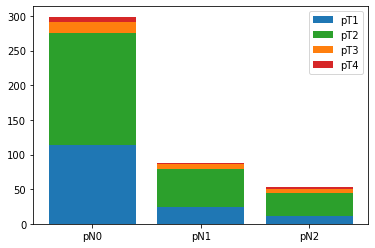

In [17]:
# create data
x = ['pN0', 'pN1', 'pN2']
y1 = np.array([114, 24, 11])
y2 = np.array([162, 55, 34])
y3 = np.array([16, 7, 5])
y4 = np.array([7, 2, 3])
  
# plot bars in stack manner
plt.bar(x, y1, color='tab:blue')
plt.bar(x, y2, bottom=y1, color='tab:green')
plt.bar(x, y3, bottom=y1+y2, color='tab:orange')
plt.bar(x, y4, bottom=y1+y2+y3, color='tab:red')

plt.legend(["pT1", "pT2", "pT3", "pT4"])
plt.savefig("DiseaseStage_bar.pdf", format="pdf", pad_inches=0,bbox_inches='tight')

### 1.9 Merge characteristics and data

In [18]:
mergedData_DiseaseStage = pd.merge(diseaseStage, dfnorm, on ='ArrayDataFile', how ="inner")

In [19]:
mergedData_DiseaseStage

,ArrayDataFile,DiseaseStage,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
0,NCI_Lung298_U133.CEL,pN0pT1,0.039586,0.006405,0.007111,0.016491,0.000332,0.009770,0.001244,0.000734,...,0.021938,0.000239,0.003545,0.004758,0.005329,0.004569,0.002614,0.013556,0.008154,0.007870
1,NCI_U133A_18L.CEL,pN0pT2,0.080805,0.005031,0.006209,0.026383,0.000442,0.010950,0.002030,0.001190,...,0.021688,0.000315,0.003969,0.007255,0.005453,0.008348,0.005079,0.019812,0.011353,0.008144
2,Moff 1221F.CEL,pN0pT4,0.057227,0.005333,0.005505,0.019848,0.000476,0.009939,0.001378,0.000949,...,0.024007,0.000256,0.003744,0.007616,0.003938,0.006242,0.007781,0.009864,0.009160,0.010310
3,Moff 1300F.CEL,pN1pT2,0.079573,0.005579,0.005818,0.018479,0.000470,0.007722,0.001511,0.001093,...,0.018499,0.000247,0.003912,0.006779,0.006885,0.006796,0.002231,0.008936,0.008851,0.009701
4,NCI_U133A_90L.CEL,pN1pT2,0.078061,0.007131,0.008390,0.021133,0.000513,0.015948,0.001478,0.001038,...,0.021937,0.000442,0.003248,0.007800,0.008171,0.010482,0.005157,0.007719,0.010056,0.012596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,NCI_Lung49_U133A.CEL,pN0pT2,0.079897,0.004824,0.007923,0.021076,0.000341,0.016644,0.001240,0.001117,...,0.021615,0.000292,0.003403,0.006656,0.005505,0.006394,0.004887,0.010018,0.008644,0.011326
436,CL2005060336AA.CEL,pN0pT2,0.050272,0.004674,0.008061,0.021326,0.000455,0.015212,0.001501,0.001143,...,0.024276,0.000348,0.004228,0.007585,0.004301,0.007643,0.003631,0.017004,0.010114,0.010579
437,Moff 0936G.CEL,pN0pT1,0.133918,0.004954,0.007926,0.019421,0.000379,0.012502,0.001434,0.001201,...,0.022727,0.000187,0.003127,0.007098,0.005612,0.007546,0.007088,0.006583,0.008639,0.011799
438,NCI_lung229_U133A.CEL,pN0pT1,0.107211,0.004241,0.005745,0.023032,0.000395,0.007969,0.001424,0.001113,...,0.021672,0.000214,0.004439,0.006855,0.006572,0.006478,0.004189,0.011859,0.010379,0.011323


### 1.10 Merge the data with the same N and split bygroup

In [20]:
pN0pT1 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN0pT1']
pN0pT2 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN0pT2']
pN0pT3 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN0pT3']
pN0pT4 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN0pT4']
pN0 = pd.concat([pN0pT1, pN0pT2,pN0pT3,pN0pT4], join="inner")

In [21]:
pN1pT1 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN1pT1']
pN1pT2 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN1pT2']
pN1pT3 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN1pT3']
pN1pT4 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN1pT4']
pN1 = pd.concat([pN1pT1, pN1pT2,pN1pT3,pN1pT4], join="inner")

In [22]:
pN2pT1 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN2pT1']
pN2pT2 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN2pT2']
pN2pT3 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN2pT3']
pN2pT4 = mergedData_DiseaseStage[mergedData_DiseaseStage['DiseaseStage']=='pN2pT4']
pN2 = pd.concat([pN2pT1, pN2pT2,pN2pT3,pN2pT4], join="inner")

plausibility check:

In [23]:
print(pN0.shape)
print(pN1.shape)
print(pN2.shape)

(299, 22217)
(88, 22217)
(53, 22217)


In [24]:
#plausibility check
299+88+53==440

True

In [25]:
pN0['DiseaseStage'] = 'pN0' 
pN1['DiseaseStage'] = 'pN1' 
pN2['DiseaseStage'] = 'pN2' 

In [26]:
pN0.to_csv('pN0.csv', sep = '\t')
pN1.to_csv('pN1.csv', sep = '\t')
pN2.to_csv('pN2.csv', sep = '\t')

## 2. Create subsets (Test data set, Validation data set, Training data set)

## 2.1 Diseasestage N0, N1, N2 balanciert

In [27]:
pN = pd.concat([pN0,pN1,pN2], join="inner")
pN = pN.reset_index()
pN.drop('index', axis=1, inplace=True)
pN

,ArrayDataFile,DiseaseStage,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
0,NCI_Lung298_U133.CEL,pN0,0.039586,0.006405,0.007111,0.016491,0.000332,0.009770,0.001244,0.000734,...,0.021938,0.000239,0.003545,0.004758,0.005329,0.004569,0.002614,0.013556,0.008154,0.007870
1,NCI_lung206_U133A.CEL,pN0,0.039127,0.005943,0.007207,0.017740,0.000391,0.008851,0.001103,0.000870,...,0.018330,0.000238,0.002721,0.006574,0.005877,0.004127,0.004379,0.006994,0.007467,0.007375
2,NCI_lung210_U133A.CEL,pN0,0.073170,0.007994,0.005592,0.018014,0.000385,0.013857,0.001539,0.000898,...,0.038351,0.000163,0.004929,0.006394,0.009909,0.008217,0.005723,0.007205,0.007146,0.009687
3,NCI_Lung_97_U133A.CEL,pN0,0.091453,0.005084,0.006027,0.017132,0.000369,0.012854,0.001266,0.001074,...,0.025556,0.000145,0.003767,0.006638,0.006519,0.004511,0.004821,0.005267,0.007285,0.012814
4,NCI_U133A_88L.CEL,pN0,0.061301,0.004706,0.008591,0.021294,0.000386,0.025012,0.001693,0.001087,...,0.035386,0.000372,0.003914,0.009053,0.004907,0.011545,0.001872,0.011866,0.010453,0.013360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,NCI_U133A_29L.CEL,pN2,0.064170,0.004135,0.008042,0.023757,0.000502,0.010737,0.001566,0.001321,...,0.030801,0.000489,0.003284,0.008762,0.005200,0.004592,0.005762,0.011198,0.011584,0.011637
436,Moff 0291A.CEL,pN2,0.069498,0.006652,0.008811,0.020204,0.000446,0.018848,0.001358,0.001338,...,0.026134,0.000338,0.003883,0.007966,0.009644,0.008920,0.033472,0.008815,0.007925,0.014939
437,Moff 0480I.CEL,pN2,0.057637,0.007211,0.007742,0.016063,0.000439,0.012353,0.001353,0.001130,...,0.019131,0.000193,0.004029,0.006901,0.004742,0.007178,0.011665,0.006498,0.008008,0.011050
438,NCI_Lung310_U133.CEL,pN2,0.052142,0.009055,0.012866,0.017363,0.000502,0.013305,0.001272,0.000995,...,0.024573,0.000178,0.004336,0.005361,0.004955,0.005540,0.005581,0.006590,0.007756,0.008270


([<matplotlib.patches.Wedge at 0x7efed08aec70>,
 [Text(-0.5880826289238918, 0.9296014315597649, 'pN0'),
  Text(0.203032724854556, -1.081100232466044, 'pN1'),
  Text(1.0221748661942982, -0.4063970262202579, 'pN2')],
 [Text(-0.32077234304939556, 0.5070553263053262, '67.95%'),
  Text(0.11074512264793963, -0.5896910358905694, '20.00%'),
  Text(0.5575499270150717, -0.22167110521104974, '12.05%')])

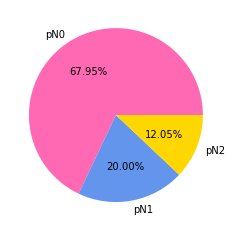

In [29]:
colors = ['hotpink','cornflowerblue','gold']
plt.pie(pN['DiseaseStage'].value_counts(),labels=pN['DiseaseStage'].unique(),autopct='%1.2f%%',colors =colors)
#plt.savefig("pN_DiseaseStage.pdf", format="pdf", pad_inches=0,bbox_inches='tight')

In [30]:
Counter(pN['DiseaseStage'])

Counter({'pN0': 299, 'pN1': 88, 'pN2': 53})

In [31]:
pN_size = pN.shape[0]
testdata_pN= pN.sample(math.floor(pN_size*0.1))
pN = pN.drop(testdata_pN.index)

In [32]:
ros = RandomOverSampler(random_state=0)

y_pN = pN["DiseaseStage"]
x_pN = pN.drop(['ArrayDataFile','DiseaseStage'], axis=1)


X_pN_resampled, Y_pN_resampled = ros.fit_resample(x_pN, y_pN)

In [33]:
y_pN.value_counts()

pN0    273
pN1     75
pN2     48
Name: DiseaseStage, dtype: int64

In [34]:
balanced_pN =  pd.merge(Y_pN_resampled, X_pN_resampled, left_index=True, right_index=True)

In [35]:
balpN = set(balanced_pN.columns.values)

<AxesSubplot:ylabel='DiseaseStage'>

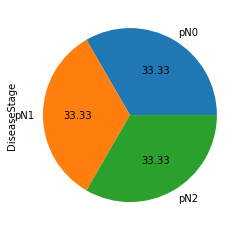

In [36]:
balanced_pN['DiseaseStage'].value_counts().plot.pie(autopct='%.2f')

In [37]:
balanced_pN_size = balanced_pN.shape[0]

In [38]:
trainingdata_balanced_pN = balanced_pN.sample(math.floor(balanced_pN_size*0.8))

In [39]:
trainingdata_balanced_pN.shape

(655, 22216)

In [40]:
validata_pN = balanced_pN.drop(trainingdata_balanced_pN.index)

In [41]:
testdata_pN.to_csv('testdata_pN.csv', sep = '\t')
trainingdata_balanced_pN.to_csv('trainingdata_balanced_pN.csv', sep = '\t')
validata_pN.to_csv('validata_pN.csv', sep = '\t')

## 3 Looking at the data

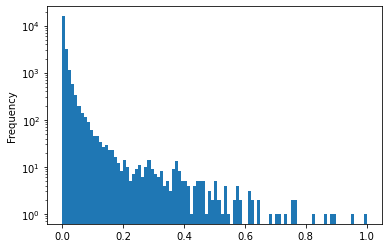

In [42]:
dfnorm.iloc[0,1:].plot.hist(bins=100).set_yscale('log')

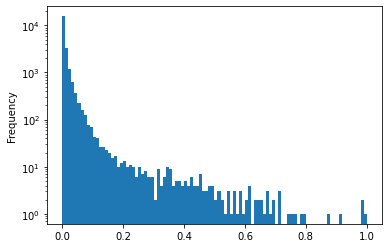

In [43]:
dfnorm.iloc[1,1:].plot.hist(bins=100).set_yscale('log')

In [44]:
header = list(pN0.columns.values)

/tmp/ipykernel_3876568/331300000.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_of_pN0 = pN0[header[-22283:]].mean()


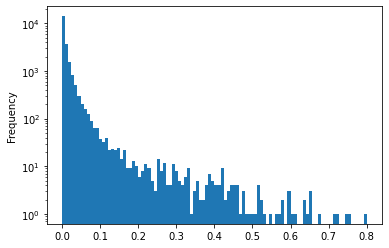

In [45]:
mean_of_pN0 = pN0[header[-22283:]].mean()
mean_of_pN0.plot.hist(bins=100).set_yscale('log')

/tmp/ipykernel_3876568/2844409106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_of_pN1 = pN1[header[-22283:]].mean()


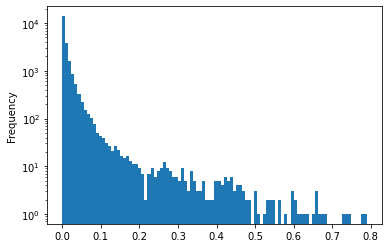

In [47]:
mean_of_pN1 = pN1[header[-22283:]].mean()
mean_of_pN1.plot.hist(bins=100).set_yscale('log')

/tmp/ipykernel_3876568/1821979979.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_of_pN2 = pN2[header[-22283:]].mean()


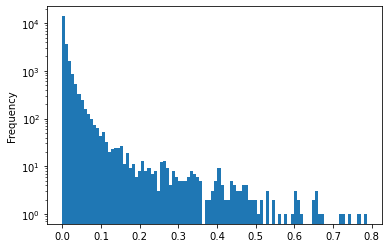

In [48]:
mean_of_pN2 = pN2[header[-22283:]].mean()
mean_of_pN2.plot.hist(bins=100).set_yscale('log')

**Gene profiles, for one gene sorted by stage**

In [49]:
gene1 = mergedData_DiseaseStage.iloc[:,1:3]
gene1_sorted = gene1.sort_values("DiseaseStage")

In [50]:
gene1_sorted

,DiseaseStage,1007_s_at
0,pN0pT1,0.039586
106,pN0pT1,0.047441
317,pN0pT1,0.091218
108,pN0pT1,0.048263
314,pN0pT1,0.067348
...,...,...
73,pN2pT3,0.053989
352,pN2pT3,0.069498
145,pN2pT4,0.052142
14,pN2pT4,0.057637


<AxesSubplot:>

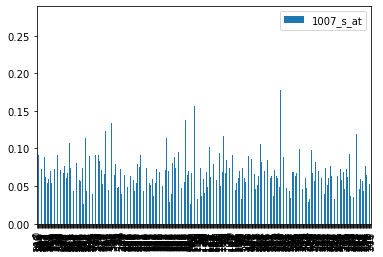

In [51]:
gene1_sorted.plot.bar()